<a href="https://colab.research.google.com/github/SiheeNoh/DFC615/blob/master/DFC615_NLP_Task2_Freinds_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. 영어 감정 분석 
  • 드라마 대본으로부터 감정을 분류 
  • Friends 데이터 다운로드  http://doraemon.iis.sinica.edu.tw/emotionlines/download.html


Friends emotion

In [1]:
%%time
!rm -f en_data.txt friends_dev.json friends_dev_test.json friends_dev_test2.json

!wget -nc https://raw.githubusercontent.com/SiheeNoh/DFC615/master/en_data.txt
!wget -nc https://raw.githubusercontent.com/SiheeNoh/DFC615/master/friends_train.json
!wget -nc https://raw.githubusercontent.com/SiheeNoh/DFC615/master/friends_test.json
!wget -nc https://raw.githubusercontent.com/SiheeNoh/DFC615/master/friends_dev.json


--2020-06-25 23:00:49--  https://raw.githubusercontent.com/SiheeNoh/DFC615/master/en_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201575 (197K) [text/plain]
Saving to: ‘en_data.txt’

en_data.txt         100%[===================>] 196.85K  --.-KB/s    in 0.04s   

2020-06-25 23:00:49 (4.30 MB/s) - ‘en_data.txt’ saved [201575/201575]

--2020-06-25 23:00:52--  https://raw.githubusercontent.com/SiheeNoh/DFC615/master/friends_train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2065470 (2.0M) [text/plain]
Saving to: ‘friends_tr

Json 파일 읽기

In [2]:
#import required modules 

import pandas as pd
import matplotlib.pyplot as plt
import json

train_data=None
test_data=None
dev_data=None

with open('friends_train.json') as f:
   train_data = json.load(f)

with open('friends_test.json') as f:
   test_data = json.load(f)

with open('friends_dev.json') as f:
   dev_data = json.load(f)



JSONEncoder 처리하기

In [3]:
train_json_code = json.JSONEncoder().encode(train_data)
#print(train_json_code)

In [4]:
test_json_code = json.JSONEncoder().encode(test_data)
#print(test_json_code)

In [5]:
dev_json_code = json.JSONEncoder().encode(dev_data)
#print(dev_json_code)


dumps 처리하기

In [6]:
train_ch = json.dumps(train_data, ensure_ascii=False)    #ensure_ascii=False 사용
#print(train_ch)


In [7]:
test_ch = json.dumps(test_data, ensure_ascii=False)    #ensure_ascii=False 사용
#print(test_ch)


In [8]:
dev_ch = json.dumps(dev_data, ensure_ascii=False)    #ensure_ascii=False 사용
#print(dev_ch)


JSONDecoder 처리하기

In [9]:
# sample
#{'annotation': '0002120',
# 'emotion': 'non-neutral',
# 'speaker': 'Phoebe',
# 'utterance': 'Oh my God, he\x92s lost it. He\x92s totally lost it.'}

train_json_code = json.JSONDecoder().decode(train_ch)
train_json_code[0][0]

{'annotation': '4100000',
 'emotion': 'neutral',
 'speaker': 'Chandler',
 'utterance': 'also I was the point person on my company\x92s transition from the KL-5 to GR-6 system.'}

In [10]:
test_json_code = json.JSONDecoder().decode(test_ch)
test_json_code[0][0]

{'annotation': '2000030',
 'emotion': 'surprise',
 'speaker': 'Mark',
 'utterance': 'Why do all you\x92re coffee mugs have numbers on the bottom?'}

In [11]:
dev_json_code = json.JSONDecoder().decode(dev_ch)
dev_json_code[0][0]

{'annotation': '0002120',
 'emotion': 'non-neutral',
 'speaker': 'Phoebe',
 'utterance': 'Oh my God, he\x92s lost it. He\x92s totally lost it.'}

In [12]:
# result checked

for i in range(0,3):
  print(train_json_code[0][i]['utterance'] + ',' + train_json_code[0][i]['emotion'])

also I was the point person on my companys transition from the KL-5 to GR-6 system.,neutral
You mustve had your hands full.,neutral
That I did. That I did.,neutral


train 데이터 처리하기

In [13]:
#for a in range(len(train_json_code)):
#  c = train_json_code[a]
#  for b in range(len(c)):
#    print(train_json_code[a][b]['utterance'] + ',' + train_json_code[a][b]['emotion'])

train_sentence = []
train_labels = []

for a in range(len(train_json_code)):
  c = train_json_code[a]
  for b in range(len(c)):
    train_sentence.append(train_json_code[a][b]['utterance'])
    train_labels.append(train_json_code[a][b]['emotion'])


In [14]:
#convert the list into data frame for better analysis
train_df = pd.DataFrame(list(zip(train_sentence, train_labels)), 
               columns =['train_Sentences', 'train_emotion']) 

In [15]:
train_df

,train_Sentences,train_emotion
0,also I was the point person on my companys tr...,neutral
1,You mustve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So lets talk a little bit about your duties.,neutral
4,My duties? All right.,surprise
...,...,...
10556,You or me?,neutral
10557,"I got it. Uh, Joey, women don't have Adam's ap...",non-neutral
10558,"You guys are messing with me, right?",surprise
10559,Yeah.,neutral


In [16]:
#take a look at the value_counts of emotion which are our labels
train_df['train_emotion'].value_counts()

neutral        4752
non-neutral    2017
joy            1283
surprise       1220
anger           513
sadness         351
disgust         240
fear            185
Name: train_emotion, dtype: int64

In [17]:
#removing the unnecessary stopwords
!pip install nlppreprocess
from nlppreprocess import NLP

nlp = NLP()

train_df['train_Sentences_clean'] = train_df['train_Sentences'].apply(nlp.process)


In [18]:
train_df

,train_Sentences,train_emotion,train_Sentences_clean
0,also I was the point person on my companys tr...,neutral,also point person my company s transition from...
1,You mustve had your hands full.,neutral,You must ve had your hands full
2,That I did. That I did.,neutral,did did
3,So lets talk a little bit about your duties.,neutral,let s talk little bit about your duties
4,My duties? All right.,surprise,My duties right
...,...,...,...
10556,You or me?,neutral,You me
10557,"I got it. Uh, Joey, women don't have Adam's ap...",non-neutral,got it Uh Joey women not Adam s apples
10558,"You guys are messing with me, right?",surprise,You guys are messing with me right
10559,Yeah.,neutral,Yeah


Test 데이터 처리하기

In [19]:
test_sentence = []
test_labels = []

for a in range(len(test_json_code)):
  c = test_json_code[a]
  for b in range(len(c)):
    test_sentence.append(test_json_code[a][b]['utterance'])
    test_labels.append(test_json_code[a][b]['emotion'])


In [20]:
#convert the list into data frame for better analysis
test_df = pd.DataFrame(list(zip(test_sentence, test_labels)), 
               columns =['test_Sentences', 'test_emotion']) 

In [21]:
test_df

,test_Sentences,test_emotion
0,Why do all youre coffee mugs have numbers on ...,surprise
1,Oh. Thats so Monica can keep track. That way ...,non-neutral
2,Y'know what?,neutral
3,It didnt.,neutral
4,"Okay, so what you used to have with Rachel, is...",joy
...,...,...
2759,"Hey, why dont you guys go get portraits done ...",neutral
2760,Thats a good idea! I bet they have one of tho...,joy
2761,"Yeah thats great! Next to that, Chandler won...",neutral
2762,Chandler what do you say?,neutral


In [22]:
#take a look at the value_counts of emotion which are our labels
test_df['test_emotion'].value_counts()

neutral        1287
non-neutral     541
joy             304
surprise        286
anger           161
sadness          85
disgust          68
fear             32
Name: test_emotion, dtype: int64

In [23]:
#removing the unnecessary stopwords
!pip install nlppreprocess
from nlppreprocess import NLP

nlp = NLP()

test_df['test_Sentences_clean'] = test_df['test_Sentences'].apply(nlp.process)


In [24]:
test_df

,test_Sentences,test_emotion,test_Sentences_clean
0,Why do all youre coffee mugs have numbers on ...,surprise,you re coffee mugs numbers bottom
1,Oh. Thats so Monica can keep track. That way ...,non-neutral,Oh That s Monica can keep track way one them...
2,Y'know what?,neutral,Y know what
3,It didnt.,neutral,didn t
4,"Okay, so what you used to have with Rachel, is...",joy,Okay what you used with Rachel what I ve got...
...,...,...,...
2759,"Hey, why dont you guys go get portraits done ...",neutral,Hey don t you guys go get portraits done by p...
2760,Thats a good idea! I bet they have one of tho...,joy,That s good idea bet they one those wind mach...
2761,"Yeah thats great! Next to that, Chandler won...",neutral,Yeah that s great Next that Chandler won t l...
2762,Chandler what do you say?,neutral,Chandler what you say


dev 데이터 처리하기

In [25]:
dev_sentence = []
dev_labels = []

for a in range(len(dev_json_code)):
  c = dev_json_code[a]
  for b in range(len(c)):
    dev_sentence.append(dev_json_code[a][b]['utterance'])
    dev_labels.append(dev_json_code[a][b]['emotion'])


In [26]:
#convert the list into data frame for better analysis
dev_df = pd.DataFrame(list(zip(dev_sentence, dev_labels)), 
               columns =['dev_Sentences', 'dev_emotion']) 

In [27]:
dev_df

,dev_Sentences,dev_emotion
0,"Oh my God, hes lost it. Hes totally lost it.",non-neutral
1,What?,surprise
2,"Or! Or, we could go to the bank, close our acc...",neutral
3,Youre a genius!,joy
4,"Aww, man, now we wont be bank buddies!",sadness
...,...,...
1173,No.,sadness
1174,What? Oh my God! Im gonna miss you so much!,sadness
1175,Im gonna miss you!,sadness
1176,I mean its the end of an era!,sadness


In [28]:
#take a look at the value_counts of emotion which are our labels
dev_df['dev_emotion'].value_counts()

neutral        491
non-neutral    214
surprise       151
joy            123
anger           85
sadness         62
fear            29
disgust         23
Name: dev_emotion, dtype: int64

In [29]:
#removing the unnecessary stopwords
!pip install nlppreprocess
from nlppreprocess import NLP

nlp = NLP()

dev_df['dev_Sentences_clean'] = dev_df['dev_Sentences'].apply(nlp.process)


In [30]:
dev_df

,dev_Sentences,dev_emotion,dev_Sentences_clean
0,"Oh my God, hes lost it. Hes totally lost it.",non-neutral,Oh my God he s lost it He s totally lost it
1,What?,surprise,What
2,"Or! Or, we could go to the bank, close our acc...",neutral,Or Or we could go bank close our accounts a...
3,Youre a genius!,joy,You re genius
4,"Aww, man, now we wont be bank buddies!",sadness,Aww man now we won t bank buddies
...,...,...,...
1173,No.,sadness,No
1174,What? Oh my God! Im gonna miss you so much!,sadness,What Oh my God I m gonna miss you much
1175,Im gonna miss you!,sadness,I m gonna miss you
1176,I mean its the end of an era!,sadness,mean it s end era


In [31]:
#import necesaary functions for lemmatization.
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


Train 데이터 처리

In [33]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
train_sentences_list=[]
train_labels_list =[]

for i in range(len(train_df.train_emotion)):

# lemmatize to cluster similar words like good, better into one word 'good', generalize tense as it doesn't have much impact on sentiment.
    train_sentences_list.append(lemmatizer.lemmatize(train_df['train_Sentences_clean'][i]))
    train_labels_list.append(train_df.train_emotion[i])

print(train_sentences_list[0])
print(train_labels_list[0])

also point person my company s transition from KL  GR  system 
neutral


In [34]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
tokenizer = Tokenizer(num_words = 20000, oov_token= 'OOV')
tokenizer.fit_on_texts(train_sentences_list)

train_sequences = tokenizer.texts_to_sequences(train_sentences_list)
train_padded = pad_sequences(train_sequences, maxlen=50, padding= 'post', truncating='post')

train_padded[0]

array([ 374,  707,  404,   18, 1079,    3, 2688,  104, 2689, 2690,  842,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [35]:
#converting the emotion labels into numbers.
dic = {'anger':0, 'disgust':1, 'fear':2, 'joy':3, 'neutral':4, 'non-neutral':5, 'sadness':6, 'surprise':7}

train_labels_list_to_num = [dic.get(n, n) for n in train_labels_list]

train_labels_list_to_num[:10]

[4, 4, 4, 4, 7, 4, 4, 4, 4, 4]

Test 데이터 처리

In [36]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
test_sentences_list=[]
test_labels_list =[]

for i in range(len(test_df.test_emotion)):

# lemmatize to cluster similar words like good, better into one word 'good', generalize tense as it doesn't have much impact on sentiment.
    test_sentences_list.append(lemmatizer.lemmatize(test_df['test_Sentences_clean'][i]))
    test_labels_list.append(test_df.test_emotion[i])

print(test_sentences_list[0])
print(test_labels_list[0])

you re coffee mugs numbers bottom 
surprise


In [37]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
tokenizer = Tokenizer(num_words = 20000, oov_token= 'OOV')
tokenizer.fit_on_texts(test_sentences_list)

test_sequences = tokenizer.texts_to_sequences(test_sentences_list)
test_padded = pad_sequences(test_sequences, maxlen=50, padding= 'post', truncating='post')

test_padded[0]

array([   2,   23,  171, 1183, 1184,  758,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [38]:
#converting the emotion labels into numbers.
#dic = {'anger':0, 'disgust':1, 'fear':2, 'joy':3, 'neutral':4, 'non-neutral':5, 'sadness':6, 'surprise':7}

test_labels_list_to_num = [dic.get(n, n) for n in test_labels_list]

test_labels_list_to_num[:10]

[7, 5, 4, 4, 3, 7, 3, 4, 5, 0]

Dev 데이터 처리

In [39]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
dev_sentences_list=[]
dev_labels_list =[]

for i in range(len(dev_df.dev_emotion)):

# lemmatize to cluster similar words like good, better into one word 'good', generalize tense as it doesn't have much impact on sentiment.
    dev_sentences_list.append(lemmatizer.lemmatize(dev_df['dev_Sentences_clean'][i]))
    dev_labels_list.append(dev_df.dev_emotion[i])

print(dev_sentences_list[0])
print(dev_labels_list[0])

Oh my God  he s lost it  He s totally lost it 
non-neutral


In [40]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
tokenizer = Tokenizer(num_words = 20000, oov_token= 'OOV')
tokenizer.fit_on_texts(dev_sentences_list)

dev_sequences = tokenizer.texts_to_sequences(dev_sentences_list)
dev_padded = pad_sequences(dev_sequences, maxlen=50, padding= 'post', truncating='post')

dev_padded[0]

array([  7,  18,  48,  64,   3, 317,   6,  64,   3, 218, 317,   6,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [41]:
#converting the emotion labels into numbers.
#dic = {'anger':0, 'disgust':1, 'fear':2, 'joy':3, 'neutral':4, 'non-neutral':5, 'sadness':6, 'surprise':7}

dev_labels_list_to_num = [dic.get(n, n) for n in dev_labels_list]

dev_labels_list_to_num[:10]

[5, 7, 4, 3, 6, 4, 4, 3, 4, 7]

In [42]:
#required modules.
import tensorflow as tf
import keras
import random
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


Using TensorFlow backend.


In [43]:
vocab_size = 30000
embedding_dim = 128


#our main model.
model = Sequential()
model.add(Embedding(vocab_size+1, embedding_dim, input_length=30))
model.add(Bidirectional(LSTM(120, return_sequences= True)))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))


In [44]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 128)           3840128   
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 240)           239040    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 240)               346560    
_________________________________________________________________
dense (Dense)                (None, 32)                7712      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
Total params: 4,433,704
Trainable params: 4,433,704
Non-trainable params: 0
______________________________________________

In [45]:
#compile
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

train / one hot encoding

In [46]:
#One hot encoding the vectors to fit in the model.
from keras.utils.np_utils import to_categorical   

train_categorical_labels = to_categorical(np.array(train_labels_list_to_num), num_classes=8)

In [47]:
train_categorical_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

test / one hot encoding

In [48]:
#One hot encoding the vectors to fit in the model.
from keras.utils.np_utils import to_categorical   

test_categorical_labels = to_categorical(np.array(test_labels_list_to_num), num_classes=8)

In [49]:
test_categorical_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

dev / one hot encoding

In [50]:
#One hot encoding the vectors to fit in the model.
from keras.utils.np_utils import to_categorical   

dev_categorical_labels = to_categorical(np.array(dev_labels_list_to_num), num_classes=8)

In [51]:
dev_categorical_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

train + test

In [52]:
#train + test

#history = model.fit(train_padded, train_categorical_labels, validation_data = (test_padded, test_categorical_labels), epochs=1)
#history = model.fit(train_padded, train_categorical_labels, validation_data = (test_padded, test_categorical_labels), epochs=2)
#history = model.fit(train_padded, train_categorical_labels, validation_data = (test_padded, test_categorical_labels), epochs=3)
#history = model.fit(train_padded, train_categorical_labels, validation_data = (test_padded, test_categorical_labels), epochs=15)
history = model.fit(train_padded, train_categorical_labels, validation_data = (test_padded, test_categorical_labels), epochs=100)

#model.evaluate()

Epoch 1/100
331/331 [==============================] - 105s 318ms/step - loss: 1.6755 - accuracy: 0.4143 - val_loss: 1.5783 - val_accuracy: 0.4664
Epoch 2/100
331/331 [==============================] - 104s 314ms/step - loss: 1.4932 - accuracy: 0.4782 - val_loss: 1.6562 - val_accuracy: 0.4479
Epoch 3/100
331/331 [==============================] - 103s 311ms/step - loss: 1.3815 - accuracy: 0.5226 - val_loss: 1.7317 - val_accuracy: 0.3723
Epoch 4/100
331/331 [==============================] - 102s 309ms/step - loss: 1.2893 - accuracy: 0.5577 - val_loss: 1.8851 - val_accuracy: 0.3922
Epoch 5/100
331/331 [==============================] - 101s 304ms/step - loss: 1.2094 - accuracy: 0.5844 - val_loss: 1.8865 - val_accuracy: 0.3622
Epoch 6/100
331/331 [==============================] - 98s 297ms/step - loss: 1.1237 - accuracy: 0.6111 - val_loss: 2.0184 - val_accuracy: 0.3462
Epoch 7/100
331/331 [==============================] - 97s 292ms/step - loss: 1.0559 - accuracy: 0.6355 - val_loss: 2.1

train + dev

In [53]:
#train + dev

#history_dev = model.fit(train_padded, train_categorical_labels, validation_data = (dev_padded, dev_categorical_labels), epochs=8)
history_dev = model.fit(train_padded, train_categorical_labels, validation_data = (dev_padded, dev_categorical_labels), epochs=100)

Epoch 1/100
331/331 [==============================] - 92s 277ms/step - loss: 0.1999 - accuracy: 0.9238 - val_loss: 11.9930 - val_accuracy: 0.2861
Epoch 2/100
331/331 [==============================] - 91s 275ms/step - loss: 0.2037 - accuracy: 0.9254 - val_loss: 11.9410 - val_accuracy: 0.2861
Epoch 3/100
331/331 [==============================] - 90s 273ms/step - loss: 0.1985 - accuracy: 0.9269 - val_loss: 11.9098 - val_accuracy: 0.2801
Epoch 4/100
331/331 [==============================] - 90s 273ms/step - loss: 0.2041 - accuracy: 0.9263 - val_loss: 12.1190 - val_accuracy: 0.2895
Epoch 5/100
331/331 [==============================] - 90s 273ms/step - loss: 0.1995 - accuracy: 0.9250 - val_loss: 12.3462 - val_accuracy: 0.2946
Epoch 6/100
331/331 [==============================] - 89s 269ms/step - loss: 0.2016 - accuracy: 0.9245 - val_loss: 11.6744 - val_accuracy: 0.2971
Epoch 7/100
331/331 [==============================] - 90s 271ms/step - loss: 0.1898 - accuracy: 0.9264 - val_loss: 12

Chart 그리기

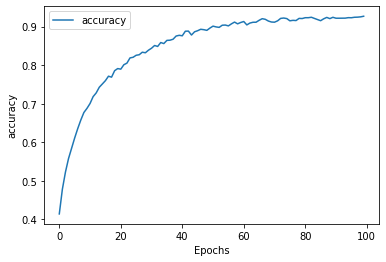

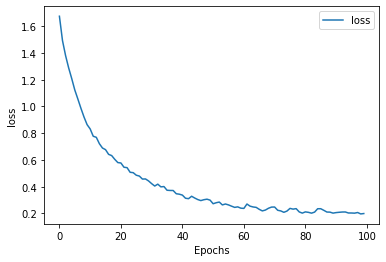

In [54]:
#we got a pretty good accurcay
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
#a smooth graph which is a good indication.


In [59]:
#save the model for further use
model.save("model.h5")

In [60]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = tf.keras.models.load_model('model.h5')

In [61]:
import codecs
with codecs.open("en_data.txt", encoding='cp949') as f3:
    data_real = [line.split('\t') for line in f3.read().splitlines()]
    data_real = data_real[1:]   # header 제외

In [62]:
data_real[0][0]
data_real[0][1]
data_real[0][2]
data_real[0][3]
data_real[0][4]

'"Alright, whadyou do with him?"'

In [63]:
X_test = list(zip(*data_real))[4]

#result_ngram = model4.predict(X_test_2)

In [64]:
X_test[:3]

('"Alright, whadyou do with him?"',
 "Oh! You're awake!",
 'Then you gotta come clean with Ma! This is not right!')

In [65]:
real_sentence = []

for a in range(len(data_real)):
  real_sentence.append(data_real[a][4])

real_sentence[:3]

['"Alright, whadyou do with him?"',
 "Oh! You're awake!",
 'Then you gotta come clean with Ma! This is not right!']

In [66]:
#convert the list into data frame for better analysis
real_df = pd.DataFrame(list(zip(real_sentence)), 
               columns =['real_Sentences']) 

In [67]:
real_df

,real_Sentences
0,"""Alright, whadyou do with him?"""
1,Oh! You're awake!
2,Then you gotta come clean with Ma! This is not...
3,"""Yeah, but this is"""
4,I don't wanna hear it! Now go to my room!
...,...
3291,I guess.
3292,"""So, shouldn?t we go give her the benefit of t..."
3293,Fine. I?m just glad I didn?t give her my secre...
3294,"""Out of curiosity, what is your secret ingredi..."


In [68]:
#removing the unnecessary stopwords
!pip install nlppreprocess
from nlppreprocess import NLP

nlp = NLP()

real_df['real_Sentences_clean'] = real_df['real_Sentences'].apply(nlp.process)

In [69]:
real_df

,real_Sentences,real_Sentences_clean
0,"""Alright, whadyou do with him?""",Alright whadyou with him
1,Oh! You're awake!,Oh You re awake
2,Then you gotta come clean with Ma! This is not...,Then you gotta come clean with Ma not right
3,"""Yeah, but this is""",Yeah but is
4,I don't wanna hear it! Now go to my room!,not wanna hear it Now go my room
...,...,...
3291,I guess.,guess
3292,"""So, shouldn?t we go give her the benefit of t...",So shouldn t we go give her benefit doubt be...
3293,Fine. I?m just glad I didn?t give her my secre...,Fine I m just glad didn t give her my secret ...
3294,"""Out of curiosity, what is your secret ingredi...",Out curiosity what your secret ingredient


real 데이터 예측

In [70]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
real_sentences_list=[]

for i in range(len(real_df.real_Sentences)):

# lemmatize to cluster similar words like good, better into one word 'good', generalize tense as it doesn't have much impact on sentiment.
    real_sentences_list.append(lemmatizer.lemmatize(real_df['real_Sentences_clean'][i]))

print(real_sentences_list[0])


 Alright  whadyou with him  


In [71]:
#toxenising the sentences to numbers and then padding the text to size of max len text.
tokenizer = Tokenizer(num_words = 20000, oov_token= 'OOV')
tokenizer.fit_on_texts(real_sentences_list)

real_sequences = tokenizer.texts_to_sequences(real_sentences_list)
real_padded = pad_sequences(real_sequences, maxlen=50, padding= 'post', truncating='post')

real_padded[0]

array([ 174, 1304,   27,   82,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [72]:
#real_result = model.predict(real_padded)
real_result = model.predict((real_padded[:1]))

In [73]:
real_result

array([[2.3174715e-10, 6.9799250e-11, 1.0390150e-05, 5.5016288e-05,
        4.6189990e-02, 9.5373452e-01, 1.1052655e-07, 1.0059240e-05]],
      dtype=float32)

In [74]:
len(real_sentences_list)

3296

In [75]:
final_list = []
for i in range(1,len(real_sentences_list)):

#predicting the sentiment of tweets and decoding the predictions simultaneously.
  final_list.append((model.predict(real_padded[i-1:i])))

In [76]:
len(final_list)

3295

In [77]:
final_predict = np.array(final_list)

In [78]:
predict_result = np.argmax(final_predict, axis=2)

In [79]:
predict_result

array([[5],
       [0],
       [4],
       ...,
       [5],
       [5],
       [3]])

In [80]:
predict_result[0][0]

5

In [81]:

en_data_result = open("en_data_result.txt", 'w')

idx = 0
predict_emo = 'emotion'

for i in predict_result :
  if predict_result[idx][0] == 0 :
    predict_emo = 'anger'
  elif predict_result[idx][0] == 1 :
    predict_emo = 'disgust'
  elif predict_result[idx][0] == 2 :
    predict_emo = 'fear'
  elif predict_result[idx][0] == 3 :
    predict_emo = 'joy'
  elif predict_result[idx][0] == 4 :
    predict_emo = 'neutral'
  elif predict_result[idx][0] == 5 :
    predict_emo = 'non-neutral'
  elif predict_result[idx][0] == 6 :
    predict_emo = 'sadness'
  else :
    predict_emo = 'surprise'
  
  #en_data_result.write(str(idx)+'\t'+str(predict_result[idx][0])+'\n')
  en_data_result.write(str(idx)+'\t'+str(predict_emo)+'\n')
  idx+=1
en_data_result.close()